In [2]:
import chess.pgn
import pandas as pd
import numpy as np

## Exemple de lecture d'une game

In [3]:
with open("game_data_2013_01.pgn") as pgn_file:
    game = chess.pgn.read_game(pgn_file)

print(game.headers)
print(game.mainline_moves())
print(str(game.mainline_moves()))

Headers(Event='Rated Classical game', Site='https://lichess.org/j1dkb5dw', Date='????.??.??', Round='?', White='BFG9k', Black='mamalak', Result='1-0', UTCDate='2012.12.31', UTCTime='23:01:03', WhiteElo='1639', BlackElo='1403', WhiteRatingDiff='+5', BlackRatingDiff='-8', ECO='C00', Opening='French Defense: Normal Variation', TimeControl='600+8', Termination='Normal')
1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#
1. e4 e6 2. d4 b6 3. a3 Bb7 4. Nc3 Nh6 5. Bxh6 gxh6 6. Be2 Qg5 7. Bg4 h5 8. Nf3 Qg6 9. Nh4 Qg5 10. Bxh5 Qxh4 11. Qf3 Kd8 12. Qxf7 Nc6 13. Qe8#


## Quelles features des metadatas sont à garder ?

- White
- Black
- Result
- UTCDate
- UTCTime
- WhiteElo
- BlackElo
- Opening
- TimeControl
- Termination

In [13]:
categories = ["White", "Black", "Result", "UTCDate", "UTCTime", "WhiteElo", "BlackElo", "ECO", "Opening", "TimeControl", "Termination"]
int_categories = ["WhiteElo", "BlackElo"]
df = pd.DataFrame(columns=tuple(categories+["Game"]))
games_list = []
NUMB_GAMES = 1000

with open("game_data_2013_01.pgn") as pgn_file:
    n_game=1
    game = chess.pgn.read_game(pgn_file)
    while game and n_game < NUMB_GAMES :
        #moves = str(game.mainline_moves())
        entry = {c:game.headers.get(c,"") for c in categories}
        #entry["Game"] = moves
        games_list.append(entry)
        n_game += 1
        game = chess.pgn.read_game(pgn_file)

df = pd.DataFrame(games_list)
df.dtypes

White          object
Black          object
Result         object
UTCDate        object
UTCTime        object
WhiteElo       object
BlackElo       object
ECO            object
Opening        object
TimeControl    object
Termination    object
dtype: object

In [12]:
### Conversion données

df[["White", "Black", "Result", "ECO",
    "Opening", "TimeControl", "Termination"]] = df[["White", "Black", "Result", "ECO",
                                                    "Opening", "TimeControl", "Termination"]].astype(str)

df.UTCDate = pd.to_datetime(df.UTCDate, format= '%Y.%m.%d')
df.UTCTime = pd.to_datetime(df.UTCTime, format= '%H:%M:%S').dt.time

df[["WhiteElo", "BlackElo"]] = df[["WhiteElo", "BlackElo"]].replace("?", np.nan)
df.WhiteElo = pd.to_numeric(df.WhiteElo, errors="coerce").astype("Int64")
df.BlackElo = pd.to_numeric(df.BlackElo, errors="coerce").astype("Int64")

df.dtypes

White                  object
Black                  object
Result                 object
UTCDate        datetime64[ns]
UTCTime                object
WhiteElo                Int64
BlackElo                Int64
ECO                    object
Opening                object
TimeControl            object
Termination            object
dtype: object

## Visualisation des données

In [8]:
import matplotlib.pyplot as plt

### ELO équilibrés ?

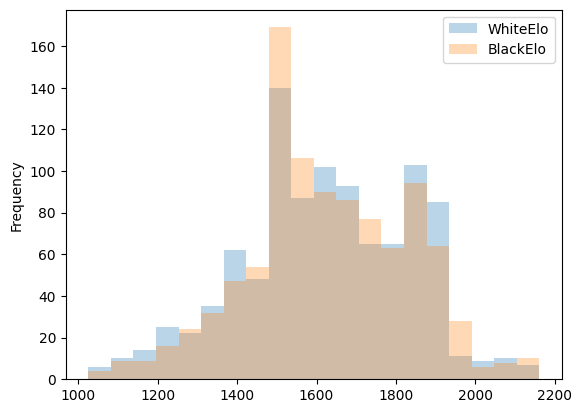

In [ ]:
df[["WhiteElo","BlackElo"]].plot.hist(bins=20, alpha=0.3)

Une plage elo entre 1400 et 1600 semble pertinente

### Combien de gambits ?

In [ ]:
df.Opening.str.contains("Gambit").sum()

157

In [27]:
df[df.Opening.str.contains("Gambit")].Opening.value_counts

<bound method IndexOpsMixin.value_counts of 9      Englund Gambit Complex: Hartlaub-Charlick Gambit
20                                        King's Gambit
23          Queen's Gambit Accepted: Saduleto Variation
40           Italian Game: Evans Gambit, Lasker Defense
43                  Alekhine Defense: John Tracy Gambit
                             ...                       
977            Queen's Gambit Refused: Marshall Defense
979      King's Gambit Declined, Queen's Knight Defense
996                                       King's Gambit
997         Queen's Gambit Accepted: Saduleto Variation
998                                     Elephant Gambit
Name: Opening, Length: 157, dtype: object>

In [ ]:
tars = df[(df.WhiteElo > 1400) & (df.WhiteElo < 1600) & (df.BlackElo > 1400) & (df.BlackElo < 1600) & ]
tars

,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination,Game
5,sport,shamirbj,1-0,2012-12-31,23:09:21,1477,1487,B00,Owen Defense,300+3,Time forfeit,1. e4 b6 2. Bc4 Bb7 3. d3 Nh6 4. Bxh6 gxh6 5. ...
6,tiggran,arion_6,0-1,2012-12-31,23:02:14,1541,1500,C53,"Italian Game: Classical Variation, Giuoco Pian...",300+0,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. d3 Bc5 5. c3...
9,adamsrj,hamiakaz,0-1,2012-12-31,23:02:48,1522,1428,A40,Englund Gambit Complex: Hartlaub-Charlick Gambit,180+5,Normal,1. d4 e5 2. dxe5 d6 3. exd6 Bxd6 4. Nf3 Nf6 5....
13,Abd0,Killi,1-0,2012-12-31,23:08:21,1436,1506,C60,Ruy Lopez: Cozio Defense,420+0,Normal,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nge7 4. Nc3 h6 5. N...
19,Killi,Abd0,1-0,2012-12-31,23:16:04,1492,1451,C24,Bishop's Opening: Berlin Defense,420+0,Normal,1. e4 e5 2. Bc4 Nf6 3. d3 Bc5 4. Bg5 Bxf2+ 5. ...
...,...,...,...,...,...,...,...,...,...,...,...,...
954,Dipankar,ale226571,0-1,2013-01-01,08:39:43,1482,1529,C20,King's Pawn Game: Leonardis Variation,300+3,Normal,1. e4 e5 2. d3 Nc6 3. f4 exf4 4. Bxf4 Bd6 5. B...
957,ale226571,Dipankar,1-0,2013-01-01,08:41:51,1529,1482,B01,Scandinavian Defense: Mieses-Kotroc Variation,300+3,Normal,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qe6+ 4. Nge2 Nc6 ...
973,Dipankar,ale226571,1-0,2013-01-01,08:57:35,1472,1539,C45,Scotch Game: Schmidt Variation,300+3,Normal,1. e4 e5 2. Nf3 Nc6 3. d4 exd4 4. Nxd4 Nf6 5. ...
974,Svetlana,Andrandand,1-0,2013-01-01,08:58:06,1515,1553,C24,Bishop's Opening: Berlin Defense,420+3,Time forfeit,1. e4 e5 2. Bc4 Nf6 3. d3 h6 4. a3 d6 5. h3 Qe...
